In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/spam.csv', encoding='ISO-8859-1')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# **The project is divided in the following parts:**
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluatio of Model
6. Improvements
7. Convert to web app
8. Deploy

# **Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.sample(5)

,v1,v2
3568,ham,She's fine. Sends her greetings
4649,ham,Finally it has happened..! Aftr decades..! BEE...
615,ham,"\Happy valentines day\"" I know its early but i..."
4964,ham,"A few people are at the game, I'm at the mall ..."
2462,ham,"Rose needs water, season needs change, poet ne..."


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2470,ham,Eat at old airport road... But now 630 oredi.....
905,ham,Hey what's up charles sorry about the late reply.
608,ham,Neva mind it's ok..
3916,ham,Eh ur laptop got no stock lei... He say mon mu...
2293,ham,Hello. Damn this christmas thing. I think i ha...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])


In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#duplicate values
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

# **Exploratory Data Analysis**

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

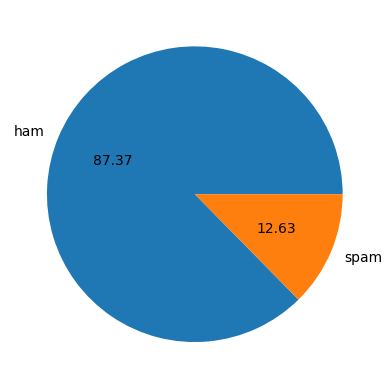

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [19]:
#Data is imbalanced

In [20]:
#Calculating number of characters, words and sentences in the sms.
# 1. Characters
df['num_characters']=df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#num of words
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df['num_words']= df['text'].apply(lambda x:len(word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
# Number of sentences
df['num_sentences']=df['text'].apply(lambda x:len((sent_tokenize(x))))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
#Analyzing not spam messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#Analyzing Spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


*The above analysis shows that the spam messages tend to have more characters than the usual messages.*

In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

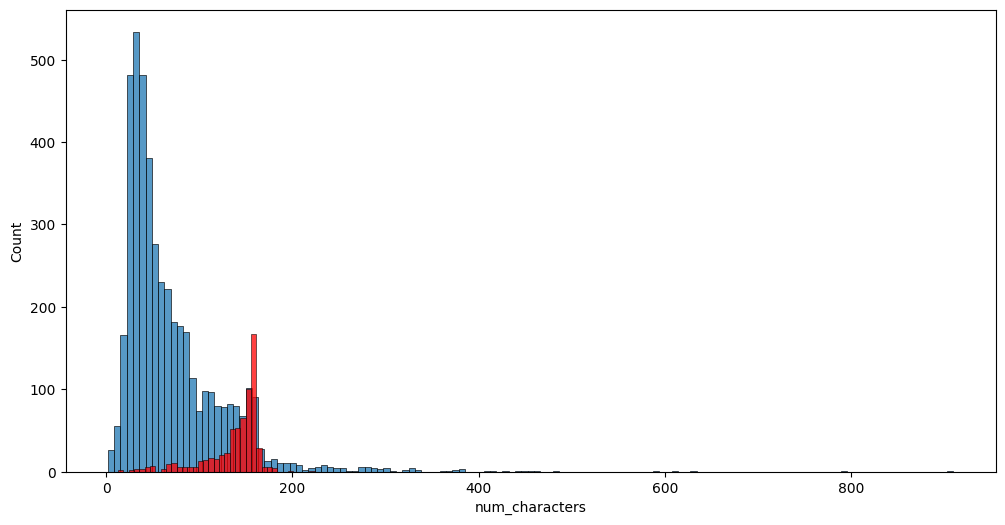

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

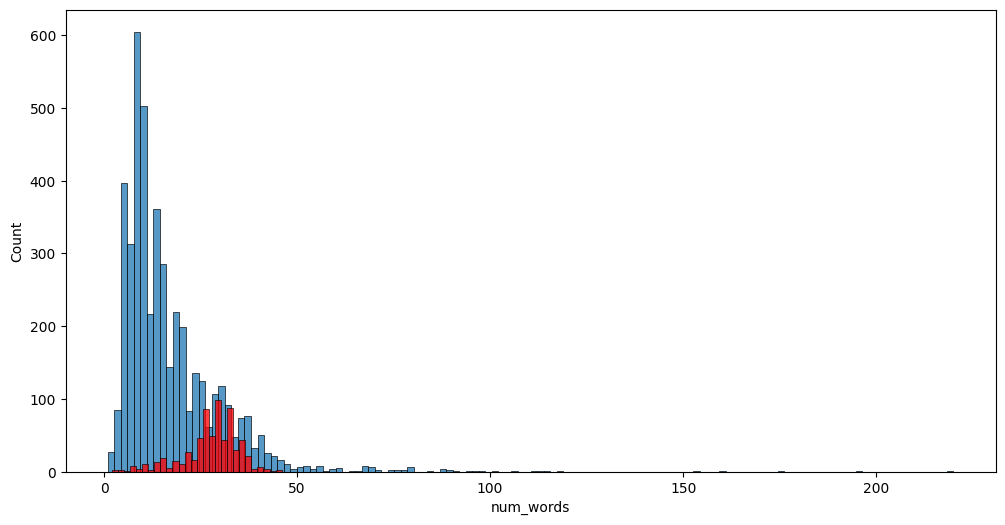

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

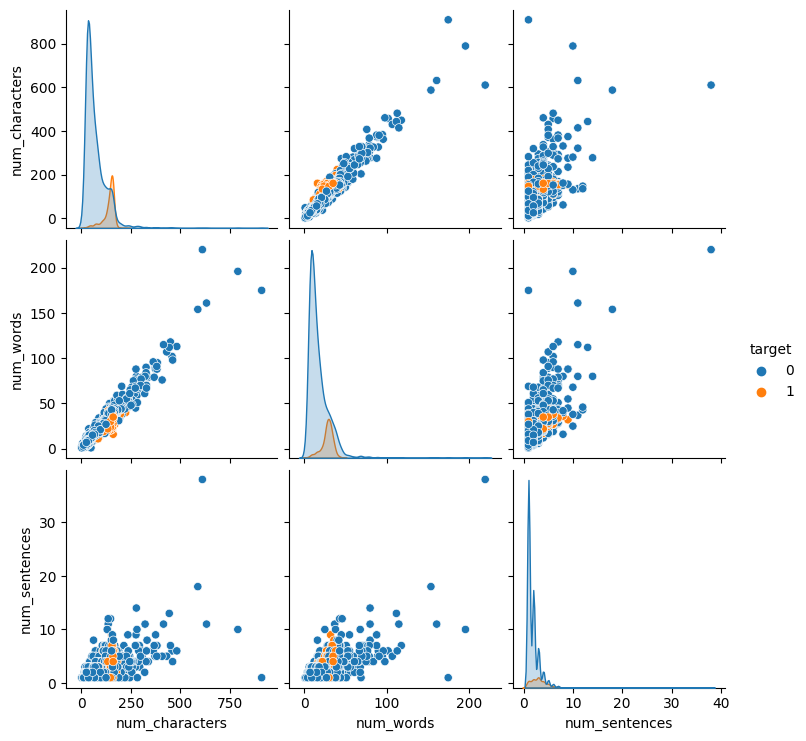

In [31]:
#Finding relationship between columns
sns.pairplot(df,hue='target')

In [32]:
df.corr()

<ipython-input-32-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-33-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

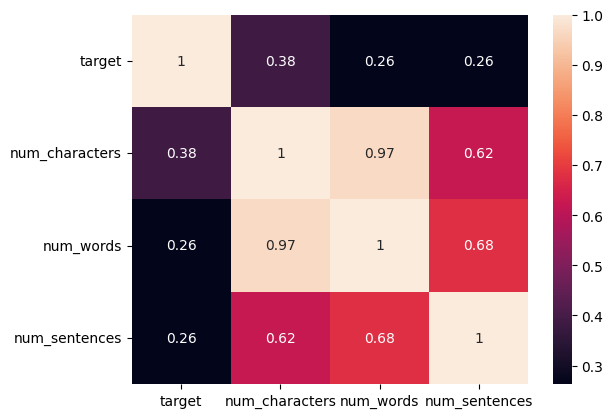

In [33]:
sns.heatmap(df.corr(),annot=True)

# **3. Data Preprocessing**


*   Lowercase
*   tokenization
*   Removing special charaters
*   Removing Stop Words and Punctuation
*   Stemming





In [34]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
def text_transform(text):
  text=text.lower()  #lowercasing
  text=nltk.word_tokenize(text)  #tokenization
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)   # removing special characters

  #stopwords
  z=[]
  for i in y:
    if i in stopwords.words('english'):
      pass
    else:
      z.append(i)

  #Stemming
  stemmer = PorterStemmer()
  stemmed_words = [stemmer.stem(word) for word in z]
  return ' '.join(stemmed_words)

In [36]:
text_transform("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry")

'free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri'

In [37]:
df['transformed_text']=df['text'].apply(text_transform)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud

In [39]:
#wc=WordCloud(width=500,height=500,background_color='white')
#spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
#plt.imshow(spam_wc)

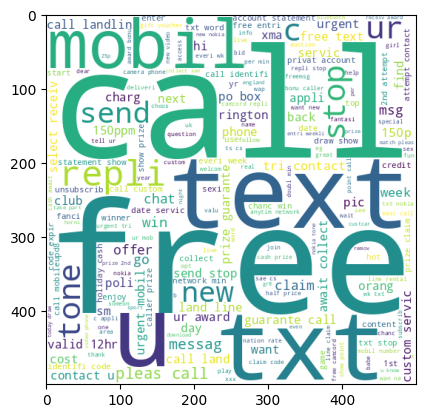

In [40]:

cs= df[df['target']==1]['transformed_text']
csf=' '.join(cs)
wc=WordCloud(width=500,height=500,background_color='white').generate(csf)
plt.imshow(wc)

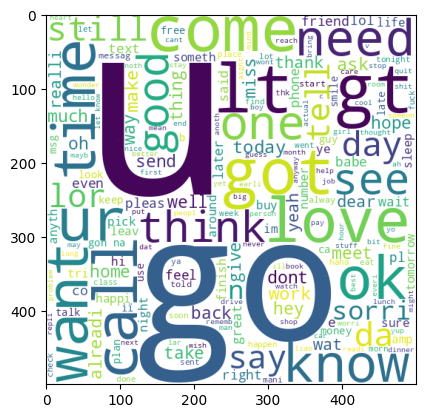

In [41]:
cs= df[df['target']==0]['transformed_text']
csf=' '.join(cs)
wc=WordCloud(width=500,height=500,background_color='white').generate(csf)
plt.imshow(wc)

# **Model Building**

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [93]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [94]:
X.shape

(5169, 6708)

In [95]:
y=df['target'].values

In [96]:
y.shape

(5169,)

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=2)

In [99]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [100]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [101]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [102]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [103]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


***Since data is imbalanced we are looking for higher precision score than higher accuracy score.***

In [104]:
import pickle

In [105]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))